# Assignment 5 Questions

## Problem Statement

#### Task 1:

Read the dataset from the bellow link

url = https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv


In [1]:
import pandas  as pd

url = "https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv"

df = pd.read_csv(url)
names_df = df.copy()

df.head(10)


,year,name,percent,sex
0,1880,John,0.081541,boy
1,1880,William,0.080511,boy
2,1880,James,0.050057,boy
3,1880,Charles,0.045167,boy
4,1880,George,0.043292,boy
5,1880,Frank,0.027380,boy
6,1880,Joseph,0.022229,boy
7,1880,Thomas,0.021401,boy
8,1880,Henry,0.020641,boy
9,1880,Robert,0.020404,boy


Questions

1. Delete unnamed columns

In [2]:
df = names_df.copy()

#Solution#01:
unnamed_columns = df.columns[df.columns.str.contains('unnamed', case=False)]
print(unnamed_columns)
df.drop(columns=unnamed_columns, inplace=True)

#Solution#02:
unnamed_columns = df.columns[df.columns.str.contains('unnamed', case=False)]
print(unnamed_columns)
df.drop(unnamed_columns, axis=1, inplace=True)

#Solution#03:
named_columns = df.columns[~df.columns.str.contains('unnamed', case=False)]
print(named_columns)
df = df.loc[:, named_columns]

#Solution#04:
named_columns_bool = [col_name.startswith("unnamed") == False for col_name in df.columns]
print(named_columns_bool)
df = df.loc[:, named_columns_bool]

#Solution#05:
named_columns = df.columns[~df.columns.str.contains('unnamed', case=False)]
named_col_indexes = [df.columns.get_loc(col_name) for col_name in named_columns]
print(named_col_indexes)
df = df.iloc[:, named_col_indexes]

#Solution#06:
named_columns_bool = [col_name.startswith("unnamed") == False for col_name in df.columns]
print(named_columns_bool)
df = df.iloc[:, named_columns_bool]
df

Index([], dtype='object')
Index([], dtype='object')
Index(['year', 'name', 'percent', 'sex'], dtype='object')
[True, True, True, True]
[0, 1, 2, 3]
[True, True, True, True]


,year,name,percent,sex
0,1880,John,0.081541,boy
1,1880,William,0.080511,boy
2,1880,James,0.050057,boy
3,1880,Charles,0.045167,boy
4,1880,George,0.043292,boy
...,...,...,...,...
257995,2008,Carleigh,0.000128,girl
257996,2008,Iyana,0.000128,girl
257997,2008,Kenley,0.000127,girl
257998,2008,Sloane,0.000127,girl


2. Show the distribution of male and female

In [3]:
df = names_df.copy()

#Solution#01: Using value_counts(normalize=False)
print("\nSolution#01: Using value_counts(normalize=False)")
print(df.sex.value_counts(normalize=False))
print("-" * 36)

#Solution#02: Using value_counts(normalize=True)
print("\nSolution#02: Using value_counts(normalize=True)")
print(df.sex.value_counts(normalize=True))
print("-" * 36)

#Soution#03: Using groupby() & count():
print("\nSolution#03: Using groupby() & count()")
print(df['sex'].groupby(df.sex).count())
print("-" * 36)

#Soution#04: Using groupby(), count() & shape:
print("\nSolution#04: Using groupby(), count() & shape")
print(df.sex.groupby(df['sex']).count() / df.shape[0])
print("-" * 36)

#Soution#05: Using groupby() & size():
print("\nSolution#05: Using groupby() & size()")
print(df.sex.groupby(df['sex']).size())
print("-" * 36)

#Soution#06: Using groupby(), size() & shape:
print("\nSolution#06: Using groupby(), size() & shape")
print(df.sex.groupby(df['sex']).size() / df.shape[0])
print("-" * 36)

#Soution#07:
print("\nSolution#07: Using subscription condition & count()")
print("boys' count: " + str(df[df.sex == 'boy'].sex.count()))
print("girls' count: " + str(df[df.sex == 'girl'].sex.count()))
print("-" * 36)

#Soution#08:
print("\nSolution#08: Using subscription condition, count() & shape")
print("boys' percent: " + str(df[df.sex == 'boy'].sex.count() / df.shape[0]))
print("girls' percent: " + str(df[df.sex == 'girl'].sex.count()  / df.shape[0]))
print("-" * 36)

#Soution#09:
print("\nSolution#09: Using subscription condition, count() & shape")
print("boy's percent: " + str(df[df.sex == 'boy'].sex.count() / df.shape[0]))
print("girl's percent: " + str(df[df.sex == 'girl'].sex.count()  / df.shape[0]))
print("-" * 36)

#Soution#10:
print("\nSolution#10: Using subscription condition & len()")
boys_count = len(df[df['sex'] == 'boy'])
girls_count = len(df[df['sex'] == 'girl'])
total_count = len(df)
print(f"boys' percent: {boys_count}/{total_count} = {boys_count/total_count}")
print(f"girls' percent: {girls_count}/{total_count} = {girls_count/total_count}")
print("-" * 36)

#Solution#11:
print("\nSolution#11: Using lambda function in apply() & sum()")
boys_count = sum(df.sex.apply(lambda x: (1 if x == 'boy' else 0)))
girls_count = sum(df.sex.apply(lambda x: (1 if x == 'girl' else 0)))
total_count = df.sex.count()
print(f"boys' percent: {boys_count}/{total_count} = {boys_count/total_count}")
print(f"girls' percent: {girls_count}/{total_count} = {girls_count/total_count}")
print("-" * 36)

#Solution#12:
print("\nSolution#12: Using lambda function in apply() & count()")
lamb_func = lambda x: x == 'boy'
boys_count = df[df.sex.apply(lamb_func)].sex.count()
lamb_func = lambda x: x == 'girl'
girls_count = df[df.sex.apply(lamb_func)].sex.count()
total_count = len(df)
print(f"boys' percent: {boys_count}/{total_count} = {boys_count/total_count}")
print(f"girls' percent: {girls_count}/{total_count} = {girls_count/total_count}")
print("-" * 36)

#Solution#13:
print("\nSolution#13: Applying index to sex column & then using filter()")
lambada = lambda x: (1 if x == 'boy' else 0)
df.sex.index = df.sex.apply(lambada)
boys_percent = df.sex.filter(like='1').count() / len(df)
girls_percent = df.sex.filter(like='0').count() / len(df)
print("boys' percent: " + str(boys_percent))
print("girls' percent: " + str(girls_percent))
print("-" * 36)



Solution#01: Using value_counts(normalize=False)
girl    129000
boy     129000
Name: sex, dtype: int64
------------------------------------

Solution#02: Using value_counts(normalize=True)
girl    0.5
boy     0.5
Name: sex, dtype: float64
------------------------------------

Solution#03: Using groupby() & count()
sex
boy     129000
girl    129000
Name: sex, dtype: int64
------------------------------------

Solution#04: Using groupby(), count() & shape
sex
boy     0.5
girl    0.5
Name: sex, dtype: float64
------------------------------------

Solution#05: Using groupby() & size()
sex
boy     129000
girl    129000
Name: sex, dtype: int64
------------------------------------

Solution#06: Using groupby(), size() & shape
sex
boy     0.5
girl    0.5
Name: sex, dtype: float64
------------------------------------

Solution#07: Using subscription condition & count()
boys' count: 129000
girls' count: 129000
------------------------------------

Solution#08: Using subscription condition, coun

3. Show the top 5 most preferred names

In [4]:
df = names_df.copy()

df.groupby(df.name).percent.max().sort_values(ascending=False).head()
#OR
df.groupby(df.name).percent.sum().sort_values(ascending=False).head()


name
John       5.320360
James      4.593850
Mary       4.534115
William    4.424557
Robert     3.836721
Name: percent, dtype: float64

4. What is the median name occurence in the dataset

In [46]:
df = names_df.copy()

sorted_df = df.groupby(df.name).percent.sum().sort_values()
mid_idx = int(len(sorted_df)/2)
#print("Row Number: " + str(mid_idx))
sorted_df.head(mid_idx).tail(1)


Row Number: 3391


name
Derrell    0.00193
Name: percent, dtype: float64

In [44]:
df = names_df.copy()

median_name_ferquency = df.name.groupby(df.name).count().median()

print("Median Name Ferquency: " + str(median_name_ferquency))

#df.groupby(df.name).percent.median()

Median Name Ferquency: 19.0


5. Distribution of male and female born count by year

In [16]:
df = names_df.copy()
df.groupby([df.year, df.sex]).sex.count()


year  sex 
1880  boy     1000
      girl    1000
1881  boy     1000
      girl    1000
1882  boy     1000
              ... 
2006  girl    1000
2007  boy     1000
      girl    1000
2008  boy     1000
      girl    1000
Name: sex, Length: 258, dtype: int64

#### Task 2:

We have the min and max temperatures in a city In India for each months of the year. We
would like to find a function to describe this and show it graphically, the dataset given below.

    Task:
    1. fitting it to the periodic function
    2. plot the fit
    
    Data
    Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
    Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18


In [81]:
import pandas as pd
import numpy as np


temp_df = pd.DataFrame(
                {'Month' : pd.date_range(start='2019-01-01', freq='M', periods=12).month_name()})

temp_df['Month'] = [month[:3] for month in temp_df.Month]
temp_df['Max_Temp'] = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_df['Min_Temp'] = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

temp_df

,Month,Max_Temp,Min_Temp
0,Jan,39,21
1,Feb,41,23
2,Mar,43,27
3,Apr,47,28
4,May,49,32
5,Jun,51,35
6,Jul,45,31
7,Aug,38,28
8,Sep,37,21
9,Oct,29,19


[Text(0, 0, 'Jan'),
 Text(0, 0, 'Feb'),
 Text(0, 0, 'Mar'),
 Text(0, 0, 'Apr'),
 Text(0, 0, 'May'),
 Text(0, 0, 'Jun'),
 Text(0, 0, 'Jul'),
 Text(0, 0, 'Aug'),
 Text(0, 0, 'Sep'),
 Text(0, 0, 'Oct'),
 Text(0, 0, 'Nov'),
 Text(0, 0, 'Dec')]

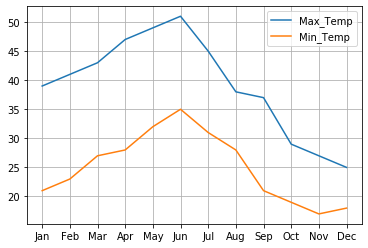

In [87]:
line_plot = temp_df.plot(grid=True)
line_plot.set_xticks(temp_df.index)
line_plot.set_xticklabels(temp_df.Month)
